#COS 575 Lab 9
##Tatiana Romanchishina

Generate a simulated two-class data set with 200 observations and two features in which there is a visible but non-linear separation between the two classes and there is some noise that does not permit a clean separation between classes. You can use any generator from the scikit library except for the circle generator. 

In [164]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy as scipy
import six as six
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split


# use seaborn plotting defaults
import sys
sys.path.append('/Users/tatiana/anaconda/pkgs/seaborn-0.6.0-np110py34_0/lib/python3.4/site-packages')
import seaborn as sns; sns.set()

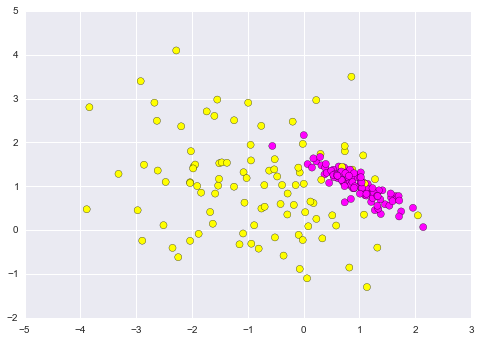

In [110]:
from sklearn.datasets.samples_generator import make_classification
X, y = make_classification(n_samples=200, n_features = 2, n_classes=2, 
                           n_informative=2, n_redundant=0, n_clusters_per_class = 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

In [111]:
X_ = X
y_ = y

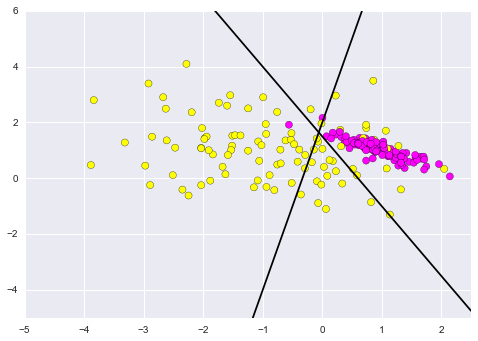

In [202]:
xfit = np.linspace(-5, 2.5)
plt.scatter(X_[:, 0], X_[:, 1], c=y, s=50, cmap='spring')

for m, b in [(6, 2), (-2.5, 1.5)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-5, 2.5)
plt.ylim(-5,6);

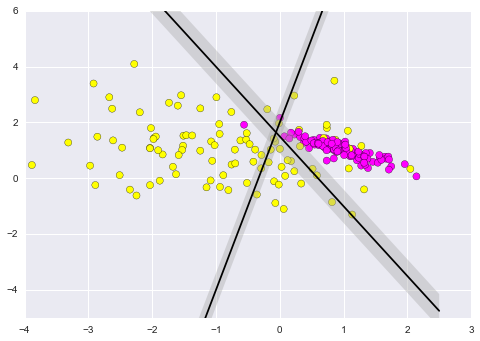

In [203]:
# margin
xfit = np.linspace(-5, 2.5)
plt.scatter(X_[:, 0], X_[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(6, 2, 0.6), (-2.5, 1.5, 0.6)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-4, 3)
plt.ylim(-5,6);

In [153]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X_, y_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [154]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

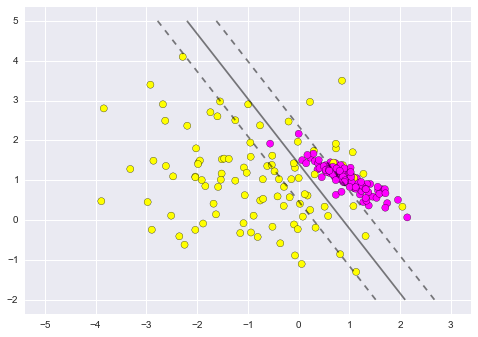

In [155]:
plt.scatter(X_[:, 0], X_[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

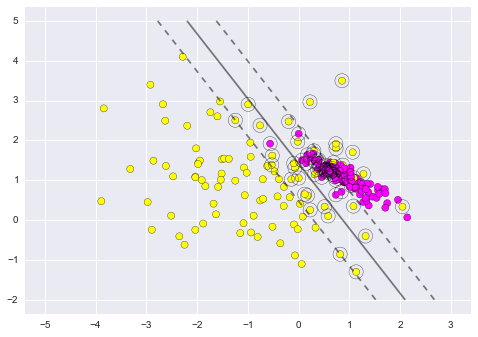

In [156]:
plt.scatter(X_[:, 0], X_[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

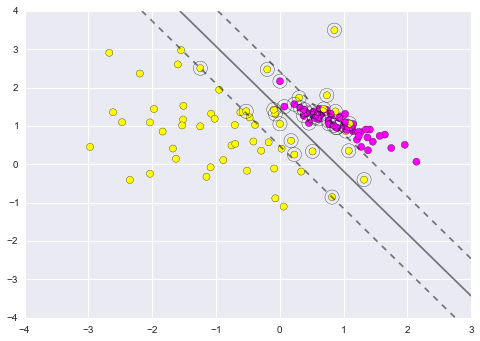

In [157]:
from IPython.html.widgets import interact

def plot_svm(N=10):
    global X_
    global y_
    X = X_[:N]
    y = y_[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-4, 3)
    plt.ylim(-4, 4)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

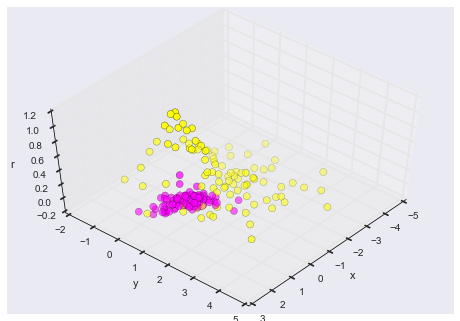

In [159]:
from mpl_toolkits import mplot3d
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X_[:, 0], X_[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

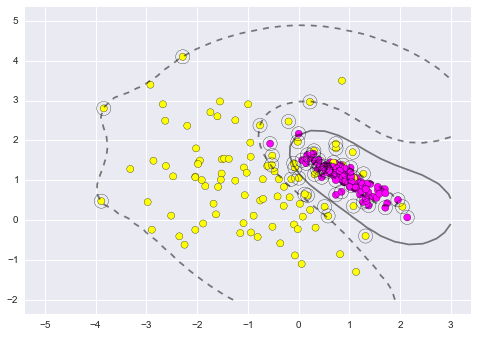

In [161]:
clf = SVC(kernel='rbf')
clf.fit(X_, y_)

plt.scatter(X_[:, 0], X_[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

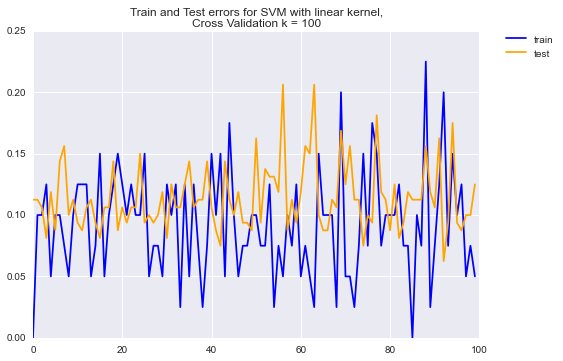

In [182]:
# compare train and test errors

# linear kernel
train_error_lin = np.empty(100)
test_error_lin = np.empty(100)
for i in range(100):
    clf = SVC(kernel='linear')
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.8)
    clf.fit(X_train, y_train)
    train_error_lin[i] = mean_squared_error(y_train, clf.predict(X_train))
    test_error_lin[i] = mean_squared_error(y_test, clf.predict(X_test))

plt.plot(np.arange(100), train_error_lin, color='blue', label='train')
plt.plot(np.arange(100), test_error_lin, color='orange', label='test')
plt.title("Train and Test errors for SVM with linear kernel,\nCross Validation k = 100")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

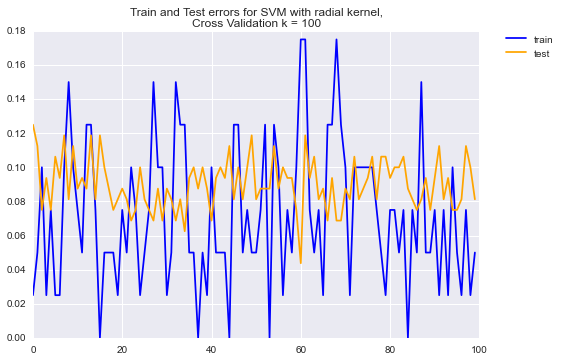

In [179]:
# radial kernel

train_error_rad = np.empty(100)
test_error_rad = np.empty(100)
for i in range(100):
    clf = SVC(kernel='rbf')
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.8)
    clf.fit(X_train, y_train)
    train_error_rad[i] = mean_squared_error(y_train, clf.predict(X_train))
    test_error_rad[i] = mean_squared_error(y_test, clf.predict(X_test))

plt.plot(np.arange(100), train_error_rad, color='blue', label='train')
plt.plot(np.arange(100), test_error_rad, color='orange', label='test')
plt.title("Train and Test errors for SVM with radial kernel,\nCross Validation k = 100")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

####Project Idea investigation : Round 2.  Locate a data source that interests you (consider Datasets and Project Ideas link).  This could be the same dataset in which case I expect more analysis & results from preliminary investigates or it could be a new dataset. What data fields would be involved in your analysis ? Describe some of the Machine Learning techniques that could be used to analyze these data. My expectation is that it will require at least a couple of paragraphs to address the above. 